First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64 

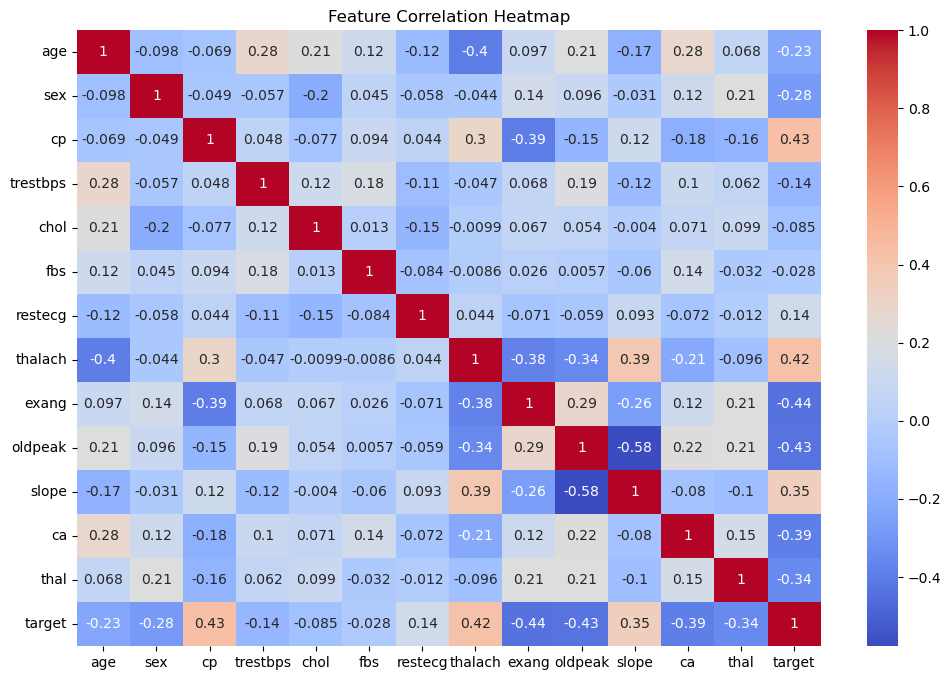

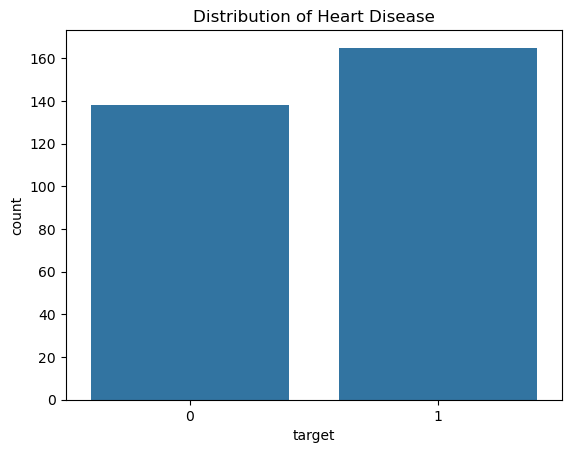

=== Logistic Regression Results ===
Accuracy: 0.8524590163934426

Confusion Matrix:
 [[25  4]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

=== Random Forest Results ===
Accuracy: 0.8360655737704918

Confusion Matrix:
 [[24  5]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



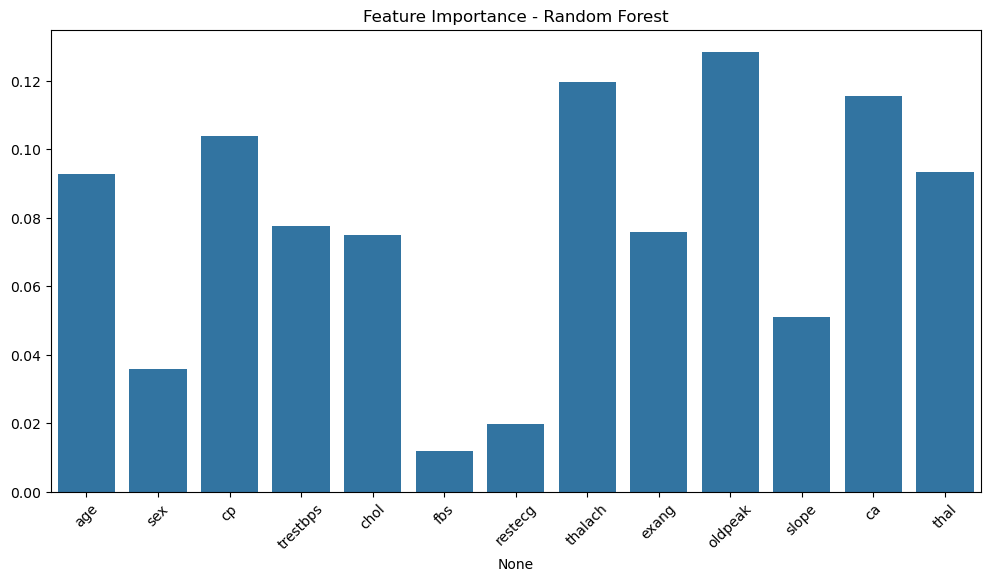

Models and scaler saved successfully!


In [4]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib

# --------------------------
# 2. Load Dataset
# --------------------------
df = pd.read_csv("heart.csv")
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nStatistical summary:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

# --------------------------
# 3. Exploratory Data Analysis (EDA)
# --------------------------
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of target
sns.countplot(x="target", data=df)
plt.title("Distribution of Heart Disease")
plt.show()

# --------------------------
# 4. Data Preprocessing
# --------------------------
# Split features and target
X = df.drop("target", axis=1)
y = df["target"]

# Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --------------------------
# 5. Logistic Regression Model
# --------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# --------------------------
# 6. Random Forest Model
# --------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Feature importance from Random Forest
importances = rf_model.feature_importances_
features = df.drop("target", axis=1).columns

plt.figure(figsize=(12,6))
sns.barplot(x=features, y=importances)
plt.title("Feature Importance - Random Forest")
plt.xticks(rotation=45)
plt.show()

# --------------------------
# 7. Save Models for Future Use
# --------------------------
joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save scaler to preprocess future data
print("Models and scaler saved successfully!")